In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("clustering_gmm_hw.ipynb")

# Homework: Hierarchical Clustering and Gaussian Mixture Models

## Instructions

This homework will help you practice hierarchical clustering and Gaussian Mixture Models using scikit-learn. Complete all questions and run all cells.


In [3]:
# Run this cell to import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
# import otter

# grader = otter.Notebook("clustering_gmm_hw.ipynb")

# Set random seed for reproducibility
np.random.seed(42)

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

---
## Part 1: Hierarchical Clustering (20 points)

In this section, you'll work with wine quality data to perform hierarchical clustering.

You'll be using scikit-learn's [hierarchical clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering).

Wine Dataset Shape: (150, 4)

First few rows:
     alcohol   acidity        pH  true_type
0  13.193878  3.122980  3.012864          0
1  12.676864  2.969678  2.605396          0
2  12.821637  2.575763  2.491495          0
3  13.158626  3.279732  2.593178          0
4  13.123971  3.954942  2.166164          0


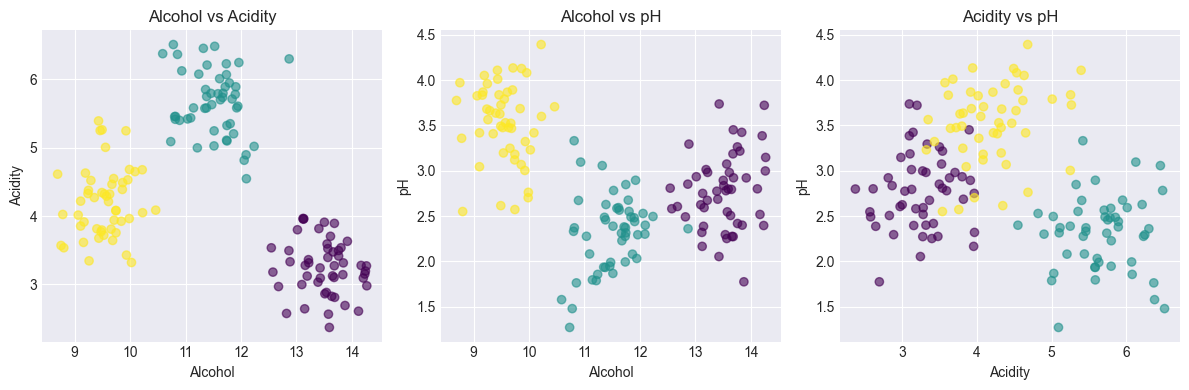

In [4]:
# Generate synthetic wine quality dataset
np.random.seed(42)
n_samples = 150

# Create three types of wine with different characteristics
# Type 1: High alcohol, low acidity
wine1 = np.random.multivariate_normal(
    mean=[13.5, 3.2, 2.8],
    cov=[[0.3, 0.05, 0.02], [0.05, 0.2, 0.01], [0.02, 0.01, 0.15]],
    size=50
)

# Type 2: Medium alcohol, high acidity
wine2 = np.random.multivariate_normal(
    mean=[11.5, 5.5, 2.2],
    cov=[[0.25, -0.05, 0.03], [-0.05, 0.3, 0.02], [0.03, 0.02, 0.12]],
    size=50
)

# Type 3: Low alcohol, medium acidity
wine3 = np.random.multivariate_normal(
    mean=[9.5, 4.2, 3.5],
    cov=[[0.2, 0.03, -0.02], [0.03, 0.25, 0.01], [-0.02, 0.01, 0.2]],
    size=50
)

wine_data = np.vstack([wine1, wine2, wine3])
true_labels = np.array([0]*50 + [1]*50 + [2]*50)

wine_df = pd.DataFrame(wine_data, columns=['alcohol', 'acidity', 'pH'])
wine_df['true_type'] = true_labels

print("Wine Dataset Shape:", wine_df.shape)
print("\nFirst few rows:")
print(wine_df.head())

# Visualize the data
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
ax1.scatter(wine_df['alcohol'], wine_df['acidity'], c=wine_df['true_type'], cmap='viridis', alpha=0.6)
ax1.set_xlabel('Alcohol')
ax1.set_ylabel('Acidity')
ax1.set_title('Alcohol vs Acidity')

ax2 = fig.add_subplot(132)
ax2.scatter(wine_df['alcohol'], wine_df['pH'], c=wine_df['true_type'], cmap='viridis', alpha=0.6)
ax2.set_xlabel('Alcohol')
ax2.set_ylabel('pH')
ax2.set_title('Alcohol vs pH')

ax3 = fig.add_subplot(133)
ax3.scatter(wine_df['acidity'], wine_df['pH'], c=wine_df['true_type'], cmap='viridis', alpha=0.6)
ax3.set_xlabel('Acidity')
ax3.set_ylabel('pH')
ax3.set_title('Acidity vs pH')

plt.tight_layout()
plt.show()

### Question 1.1: Computing Linkage Matrix (5 points)

Compute the linkage matrix for the wine data using **Ward's method**. Store the result in a variable called `linkage_ward`. Use only the feature columns (alcohol, acidity, pH) - not the true_type column.

In [5]:
X_wine = wine_df[['alcohol', 'acidity', 'pH']].values
linkage_ward = linkage(X_wine, method='ward')


In [6]:
grader.check("q1_1")

q1_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1.2: Visualizing the Dendrogram (5 points)

Create a dendrogram from your linkage matrix. Make sure to:
- Add appropriate title and labels
- Use `truncate_mode='lastp'` with `p=30` to make it readable

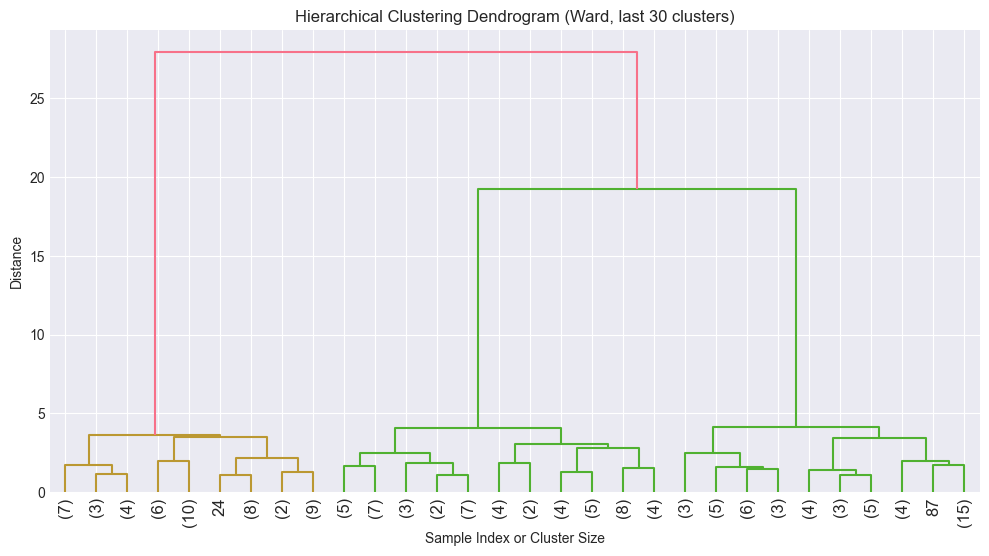

In [7]:
plt.figure(figsize=(12, 6))
dendrogram(
    linkage_ward,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
)
plt.title('Hierarchical Clustering Dendrogram (Ward, last 30 clusters)')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()



<!-- END QUESTION -->

### Question 1.3: Comparing Linkage Methods (5 points)

Compare three different linkage methods (single, complete, and average) by computing the silhouette score for each when cutting the dendrogram into 3 clusters. Store your results in variables:
- `silhouette_single`
- `silhouette_complete`
- `silhouette_average`

In [8]:
# YOUR CODE HERE

# Compute linkage matrices
linkage_single = linkage(X_wine, method='single')
linkage_complete = linkage(X_wine, method='complete')
linkage_average = linkage(X_wine, method='average')

# Get cluster labels for k=3
labels_single = fcluster(linkage_single, t=3, criterion='maxclust')
labels_complete = fcluster(linkage_complete, t=3, criterion='maxclust')
labels_average = fcluster(linkage_average, t=3, criterion='maxclust')

# Compute silhouette scores
silhouette_single = silhouette_score(X_wine, labels_single)
silhouette_complete = silhouette_score(X_wine, labels_complete)
silhouette_average = silhouette_score(X_wine, labels_average)

print("Silhouette (single):", silhouette_single)
print("Silhouette (complete):", silhouette_complete)
print("Silhouette (average):", silhouette_average)



Silhouette (single): 0.6581285169141858
Silhouette (complete): 0.6581285169141858
Silhouette (average): 0.6540684190672164


In [9]:
grader.check("q1_3")

q1_3 results: All test cases passed!

### Question 1.4: Optimal Number of Clusters (5 points)

Using Ward's linkage, determine the optimal number of clusters by computing silhouette scores for k=2 to k=10. Store the silhouette scores in an array called `silhouette_scores` and the optimal number of clusters in `optimal_k`.

In [10]:
k_range = range(2, 11)
silhouette_scores = []
for k in k_range:
    labels = fcluster(linkage_ward, t=k, criterion='maxclust')
    score = silhouette_score(X_wine, labels)
    silhouette_scores.append(score)

silhouette_scores = np.array(silhouette_scores)
optimal_k = k_range[np.argmax(silhouette_scores)]

print("Silhouette scores (k=2 to 10):", silhouette_scores)
print("Optimal k:", optimal_k)


Silhouette scores (k=2 to 10): [0.55404646 0.65406842 0.52729686 0.39120732 0.24032241 0.25759436
 0.26618946 0.26824544 0.2763378 ]
Optimal k: 3


In [11]:
grader.check("q1_4")

q1_4 results: All test cases passed!

---
## Part 2: Gaussian Mixture Models (20 points)

In this section, you'll work with customer segmentation data to perform GMM clustering.

You'll be using scikit-learn's [Gaussian Mixture Models](https://scikit-learn.org/stable/modules/mixture.html).  See also the [API documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture).

Customer Dataset Shape: (330, 3)

First few rows:
    spending  frequency  true_segment
0  26.703186  13.406656             0
1  23.667650  19.638498             0
2  31.911467  14.570919             0
3  18.077392  14.693496             0
4  32.624303  18.129988             0


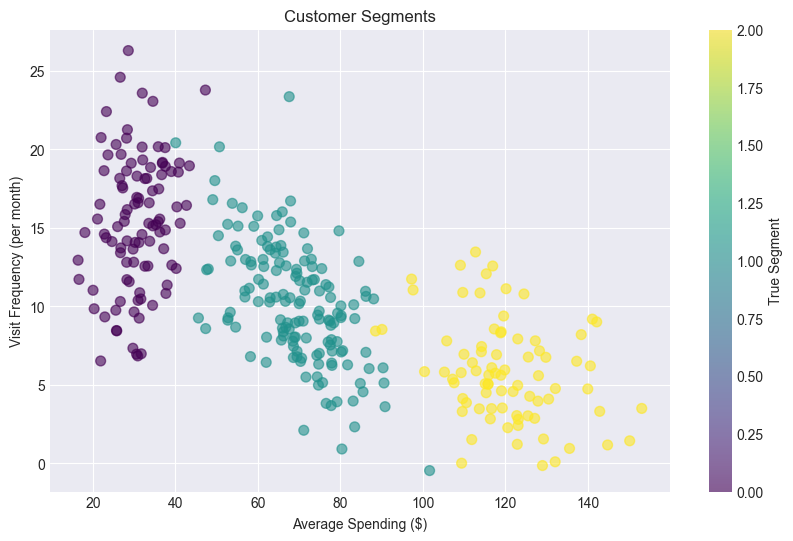

In [12]:
# Generate synthetic customer data
np.random.seed(42)

# Customer Segment 1: Budget shoppers (low spending, high frequency)
segment1 = np.random.multivariate_normal(
    mean=[30, 15],
    cov=[[50, 10], [10, 20]],
    size=100
)

# Customer Segment 2: Regular shoppers (medium spending, medium frequency)
segment2 = np.random.multivariate_normal(
    mean=[70, 10],
    cov=[[100, -20], [-20, 15]],
    size=150
)

# Customer Segment 3: Premium shoppers (high spending, low frequency)
segment3 = np.random.multivariate_normal(
    mean=[120, 6],
    cov=[[150, -10], [-10, 10]],
    size=80
)

customer_data = np.vstack([segment1, segment2, segment3])
true_segments = np.array([0]*100 + [1]*150 + [2]*80)

customer_df = pd.DataFrame(customer_data, columns=['spending', 'frequency'])
customer_df['true_segment'] = true_segments

print("Customer Dataset Shape:", customer_df.shape)
print("\nFirst few rows:")
print(customer_df.head())

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(customer_df['spending'], customer_df['frequency'],
            c=customer_df['true_segment'], cmap='viridis', alpha=0.6, s=50)
plt.xlabel('Average Spending ($)')
plt.ylabel('Visit Frequency (per month)')
plt.title('Customer Segments')
plt.colorbar(label='True Segment')
plt.show()

### Question 2.1: Fitting a GMM (5 points)

Fit a Gaussian Mixture Model with 3 components to the customer data. Store the fitted model in `gmm_model` and the predicted labels in `gmm_labels`. Use:
- `n_components=3`
- `covariance_type='full'`
- `random_state=42`

In [13]:
X_customer = customer_df[['spending', 'frequency']].values

gmm_model = GaussianMixture(
    n_components=3,
    covariance_type='full',
    random_state=42
    )
gmm_model.fit(X_customer)
gmm_labels = gmm_model.predict(X_customer)

print(f"Converged: {gmm_model.converged_}")
print(f"Number of iterations: {gmm_model.n_iter_}")


Converged: True
Number of iterations: 5


In [14]:
grader.check("q2_1")

q2_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 2.2: Visualizing GMM Results (5 points)

Create a scatter plot showing the GMM cluster assignments. Include:
- Points colored by predicted cluster
- Cluster centers marked with 'X'
- Appropriate labels and title

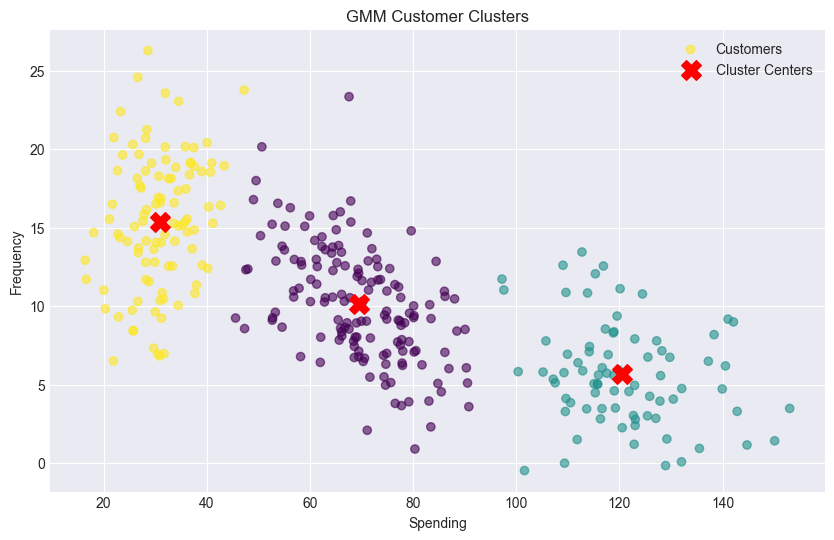

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(
    X_customer[:, 0],
    X_customer[:, 1],
    c=gmm_labels,
    cmap='viridis',
    alpha=0.6,
    label='Customers'
)
# Cluster centers
plt.scatter(
    gmm_model.means_[:, 0],
    gmm_model.means_[:, 1],
    c='red',
    marker='X',
    s=200,
    label='Cluster Centers'
)
plt.xlabel('Spending')
plt.ylabel('Frequency')
plt.title('GMM Customer Clusters')
plt.legend()
plt.show()



<!-- END QUESTION -->

### Question 2.3: Model Selection with BIC (5 points)

Compare GMMs with different numbers of components (1 to 8) using the Bayesian Information Criterion (BIC). Store the BIC values in an array called `bic_scores` and the optimal number of components in `optimal_components`.

See also the [API documentation](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.bic).

In [16]:
n_components_range = range(1, 9)
bic_scores = []
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=42)
    gmm.fit(X_customer)
    bic = gmm.bic(X_customer)
    bic_scores.append(bic)
bic_scores = np.array(bic_scores)
optimal_components = n_components_range[np.argmin(bic_scores)]

print("BIC scores (components=1 to 8):", bic_scores)
print("Optimal number of components:", optimal_components)



BIC scores (components=1 to 8): [5093.41256532 5045.84191919 4930.20081941 4960.87657383 4996.38784544
 5025.67827862 5056.95525073 5083.01424164]
Optimal number of components: 3


In [17]:
grader.check("q2_3")

q2_3 results: All test cases passed!

### Question 2.4: Comparing Covariance Types (5 points)

Compare GMMs with 3 components using different covariance types ('full', 'tied', 'diag', 'spherical'). Compute the BIC for each and store the results in a dictionary called `covariance_bic` with keys as covariance types and values as BIC scores.

In [18]:
covariance_types = ['full', 'tied', 'diag', 'spherical']
covariance_bic = {}

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=3, covariance_type=cov_type, random_state=42)
    gmm.fit(X_customer)
    bic = gmm.bic(X_customer)
    covariance_bic[cov_type] = bic

print("Covariance type BICs:", covariance_bic)


Covariance type BICs: {'full': np.float64(4930.200819408382), 'tied': np.float64(4957.452171849268), 'diag': np.float64(4964.2472778648425), 'spherical': np.float64(5212.3794088262)}


In [19]:
grader.check("q2_4")

q2_4 results: All test cases passed!

---
## Question 3: GMM vs K-means (5 points)

Compare GMM and K-means clustering on non-spherical data. Compute the Adjusted Rand Index (ARI) for both methods and store them in `ari_gmm` and `ari_kmeans`.

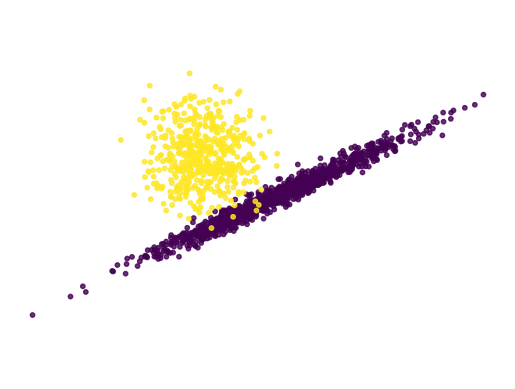

In [20]:
# Number of samples of larger component
n_samples = 1000

# C is a transfomation that will make a heavily skewed 2-D Gaussian
C = np.array([[0.1, -0.1], [1.7, .8]])

import warnings
warnings.filterwarnings('ignore')

rng = np.random.default_rng(0)

# now we construct a data matrix that has n_samples from the skewed distribution,
# and n_samples/2 from a symmetric distribution offset to position (-3, 1)
X = np.r_[(rng.standard_normal((n_samples, 2)) @ C),
          .7 * rng.standard_normal((n_samples//2, 2)) + np.array([-2, 1])]
y = np.array([0] * n_samples + [1] * (n_samples//2))

plt.scatter(X[:, 0], X[:, 1], s = 10, alpha = 0.8, c=y, cmap='viridis')
plt.axis('equal')
plt.axis('off')
plt.show()

In [21]:
from sklearn.cluster import KMeans

# Generate data
n_samples = 1000
C = np.array([[0.1, -0.1], [1.7, .8]])
rng = np.random.default_rng(0)
X = np.dot(np.random.randn(n_samples, 2), C)
y_true = np.concatenate(([0] * (n_samples // 2), [1] * (n_samples // 2)))
X[: n_samples // 2] += np.array([4, 4])

# Fit GMM
gmm_moons = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
labels_gmm = gmm_moons.fit_predict(X)
ari_gmm = adjusted_rand_score(y_true, labels_gmm)

# Fit K-means
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X)
ari_kmeans = adjusted_rand_score(y_true, labels_kmeans)

print("ARI (GMM):", ari_gmm)
print("ARI (K-means):", ari_kmeans)


ARI (GMM): 1.0
ARI (K-means): 0.7777022282662366


In [22]:
grader.check("q3")

q3 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Execute all cells and save the notebook before submitting.

In [23]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

OSError: xelatex not found on PATH, if you have not installed xelatex you may need to do so. Find further instructions at https://nbconvert.readthedocs.io/en/latest/install.html#installing-tex.